In [1]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import sklearn

## Read the dataset and do some basic initial analysis

In [2]:
#read dataset
df = pd.read_csv(r"C:\Users\Admin\Documents\Python Projects\SuperStore\Sample - Superstore.csv", encoding="Windows-1252", index_col="Row ID")

### Dataset Description
1. Order ID: Unique Order ID for each Customer.
2. Order Date: Order Date of the product.
3. Ship Date: Shipping Date of the Product.
4. Ship Mode: Shipping Mode specified by the Customer.
5. Customer ID: Unique ID to identify each Customer.
6. Customer Name: Name of the Customer.
7. Segment: The segment where the Customer belongs.
8. Country: Country of residence of the Customer.
9. City: City of residence of the Customer.
10. State: State of residence of the Customer.
11. Postal Code: Postal Code of every Customer.
12. Region: Region where the Customer belongs.
13. Product ID: Unique ID of the Product.
14. Category: Category of the product ordered.
15. Sub-Category: Sub-Category of the product ordered.
16. Product Name: Name of the Product
17. Sales: Sales of the Product.
18. Quantity: Quantity of the Product.
19. Discount: Discount provided.
20. Profit: Profit/Loss incurred.



In [3]:
#get info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount     

In [4]:
# before going further lets change the col names into sth more pythonic
df.rename(columns={"Order ID":"Order_ID", "Order Date":"Order_Date", "Ship Date":"Ship_Date", "Ship Mode":"Ship_Mode", "Customer ID":"Customer_ID",
                   "Customer Name":"Customer_Name", "Postal Code":"Postal_Code", "Product ID":"Product_ID", "Sub-Category":"Sub_Category",
                   "Product Name":"Product_Name"}, inplace=True)

In [5]:
# seeing the null, unique, and datatype of each column 
df_init_analysis = pd.DataFrame({ "Null_Count":[num for num in df.isna().sum()],
                                 "Unique_Count":[num for num in df.nunique()], "Datatype":df.dtypes})
df_init_analysis

,Null_Count,Unique_Count,Datatype
Order_ID,0,5009,object
Order_Date,0,1237,object
Ship_Date,0,1334,object
Ship_Mode,0,4,object
Customer_ID,0,793,object
Customer_Name,0,793,object
Segment,0,3,object
Country,0,1,object
City,0,531,object
State,0,49,object


## Dealing with duplicate values and null values and fixing datetime format

In [6]:
# checking for duplicate values
df[df.duplicated(keep=False)]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [7]:
#dropping duplicate row
df.drop(3407, inplace=True)
#check if still duplicate
df[df.duplicated(keep=False)]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,


In [8]:
# dealing with datetime
df["Order_Date"] =pd.to_datetime(df["Order_Date"], format="%m/%d/%Y")
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"], format="%m/%d/%Y")
print(df["Order_Date"].dtype, "\nabove is dtype, below is the column of df\n", df["Order_Date"])
print(df["Ship_Date"].dtype, "\nabove is dtype, below is the column of df\n", df["Ship_Date"])

datetime64[ns] 
above is dtype, below is the column of df
 Row ID
1      2016-11-08
2      2016-11-08
3      2016-06-12
4      2015-10-11
5      2015-10-11
          ...    
9990   2014-01-21
9991   2017-02-26
9992   2017-02-26
9993   2017-02-26
9994   2017-05-04
Name: Order_Date, Length: 9993, dtype: datetime64[ns]
datetime64[ns] 
above is dtype, below is the column of df
 Row ID
1      2016-11-11
2      2016-11-11
3      2016-06-16
4      2015-10-18
5      2015-10-18
          ...    
9990   2014-01-23
9991   2017-03-03
9992   2017-03-03
9993   2017-03-03
9994   2017-05-09
Name: Ship_Date, Length: 9993, dtype: datetime64[ns]


## Exploratory Data Analysis

In [9]:
#make month and days of week col
df["Order_Weekday"] = df["Order_Date"].apply(lambda x:x.weekday())
df["Order_Month"] = df["Order_Date"].apply(lambda x:x.month)

In [10]:
#make weekday and month dicts to make it easier to understand when making graphs
Weekday_dict = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}

Month_dict = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"Augest", 
              9:"September", 10:"October", 11:"November", 12:"December"}

### Find the most sales and profit on the following features: weekday, ship mode, segment, category

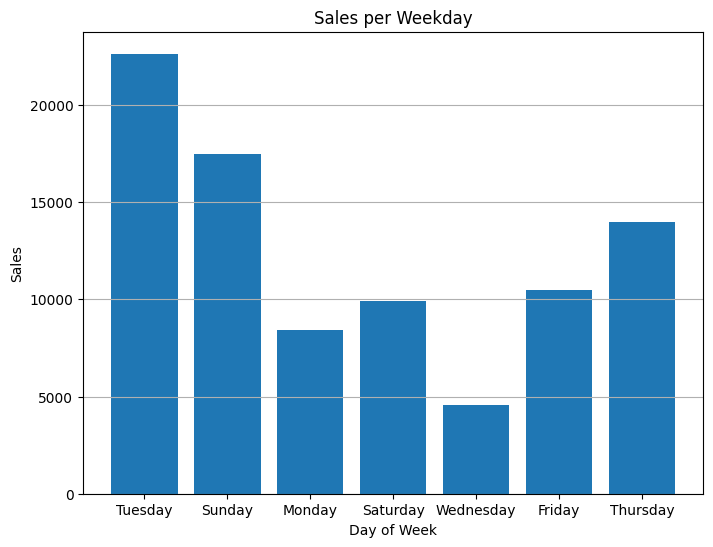

In [11]:
#bar graph of sales on any given weekday
plt.figure(figsize=(8,6))
plt.bar(df["Order_Weekday"].apply(lambda x:Weekday_dict[x]), df["Sales"])
plt.xlabel("Day of Week")
plt.ylabel("Sales")
plt.title("Sales per Weekday")
plt.grid(axis="y")
plt.show()
plt.close()

#### The graph above shows that sales are highest on Tuesdays followed by Sundays and Thursdays; And so it would be wise to check stock before these days.

In [12]:
#make a df to sum the profit of each given day of the week
orderweek_profit_df = pd.DataFrame(df.groupby("Order_Weekday")["Profit"].sum())
orderweek_profit_df.reset_index(inplace=True)

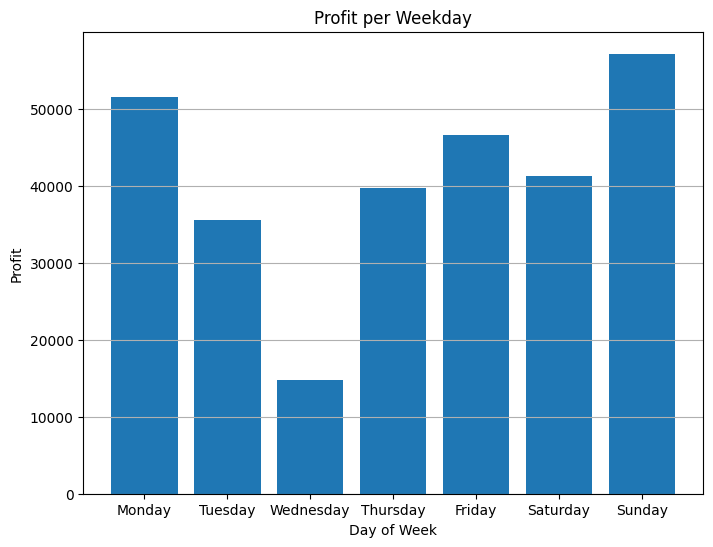

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [13]:
#bar graph of profit on any given weekday
plt.figure(figsize=(8,6))
plt.bar(orderweek_profit_df["Order_Weekday"].apply(lambda x:Weekday_dict[x]), orderweek_profit_df["Profit"])
plt.xlabel("Day of Week")
plt.ylabel("Profit")
plt.title("Profit per Weekday")
plt.grid(axis="y")
plt.show()
plt.close

#### The graph above shows that although Tuesdays and Thursdays have high sale numbers, their profit numbers are lower than Sundays and even Saturdays and Mondays. This warrantes further investigation; for instance in the type of goods sold on these days
#### Lets dive a little deeper into this issue

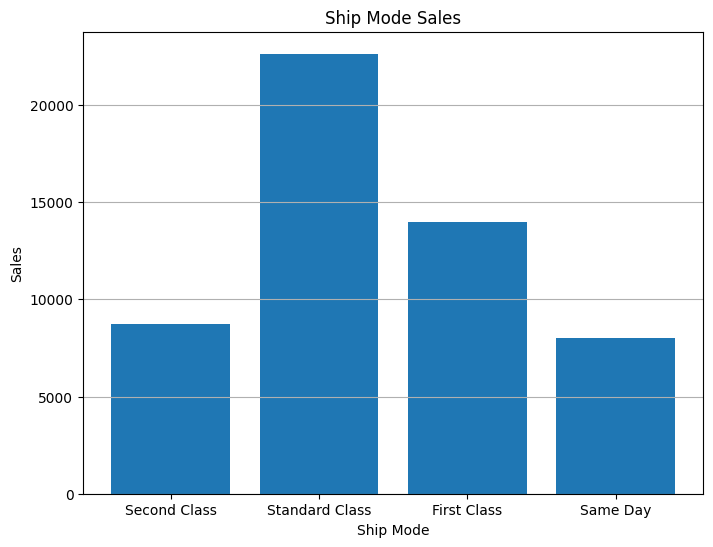

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [14]:
#bar graph of sales per each ship mode
plt.figure(figsize=(8,6))
plt.bar(df["Ship_Mode"], df["Sales"])
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.title("Ship Mode Sales")
plt.grid(axis="y")
plt.show()
plt.close

In [15]:
#make a df to sum the profit of each ship mode
shipmode_profit_df = pd.DataFrame(df.groupby("Ship_Mode")["Profit"].sum())
shipmode_profit_df.reset_index(inplace=True)

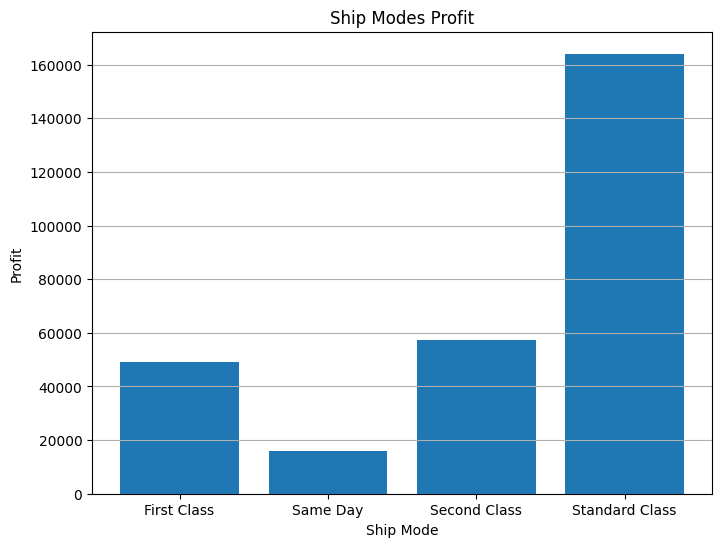

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [16]:
#bar graph of profit on any ship mode
plt.figure(figsize=(8,6))
plt.bar(shipmode_profit_df["Ship_Mode"], shipmode_profit_df["Profit"])
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.title("Ship Modes Profit")
plt.grid(axis="y")
plt.show()
plt.close

#### Standard class has the most sales and profit. Considering the other modes, second class ship mode while having less sales than first class, boasts a higher profit number than both first class and same day ship modes. In opposition to this, same day ship mode well underperforms.
#### From this data we may infer that it might be benefitial to prioritize second class shipping over first class and same day shipping.

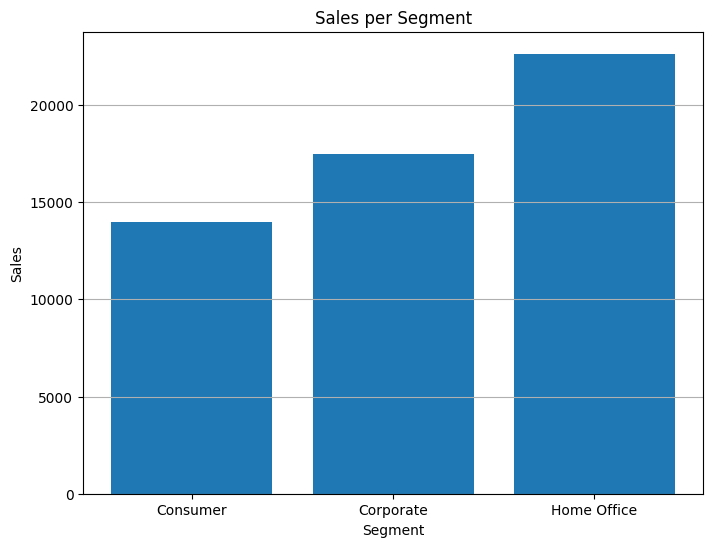

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [17]:
#bar graph of sales per each segment
plt.figure(figsize=(8,6))
plt.bar(df["Segment"], df["Sales"])
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.title("Sales per Segment")
plt.grid(axis="y")
plt.show()
plt.close

In [18]:
#make a df to sum the profit of each ship mode
segment_profit_df = pd.DataFrame(df.groupby("Segment")["Profit"].sum())
segment_profit_df.reset_index(inplace=True)

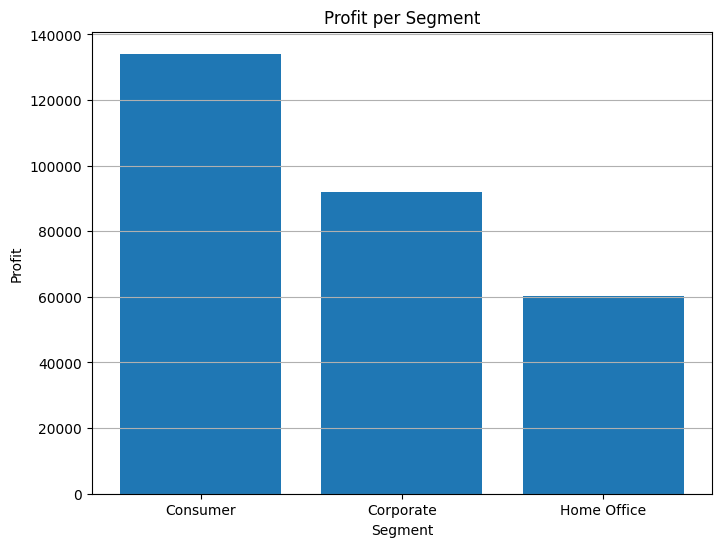

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [19]:
#bar graph of profit on each segment
plt.figure(figsize=(8,6))
plt.bar(segment_profit_df["Segment"], segment_profit_df["Profit"])
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.title("Profit per Segment")
plt.grid(axis="y")
plt.show()
plt.close

#### In segment we see the same trend that the segment with the least sales boasts the most profit. So if prioritization is required it shuild be: Consumer--> Corporate--> Home Office 

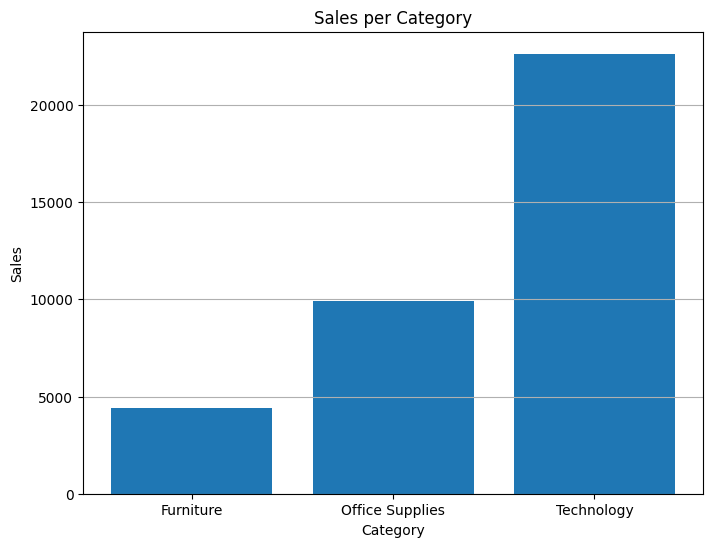

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [20]:
#bar graph of sales per each category
plt.figure(figsize=(8,6))
plt.bar(df["Category"], df["Sales"])
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Sales per Category")
plt.grid(axis="y")
plt.show()
plt.close

In [21]:
#make a df to sum the profit of each category
category_profit_df = pd.DataFrame(df.groupby("Category")["Profit"].sum())
category_profit_df.reset_index(inplace=True)

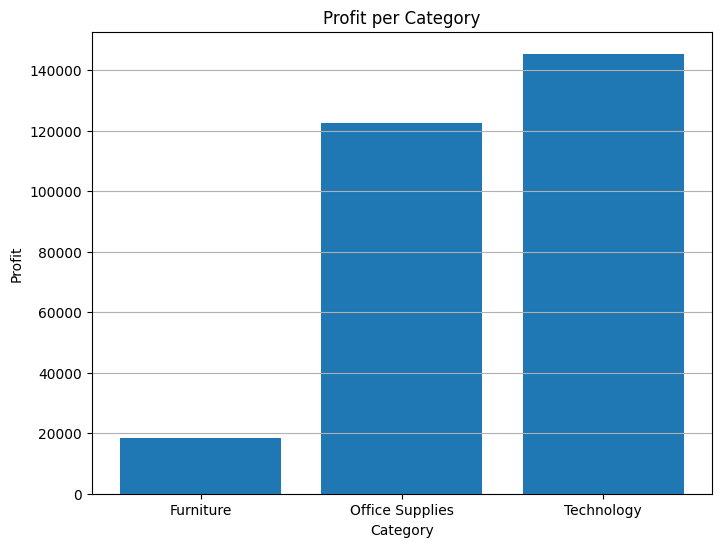

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [22]:
#bar graph of profit on each category
plt.figure(figsize=(8,6))
plt.bar(category_profit_df["Category"], category_profit_df["Profit"])
plt.xlabel("Category")
plt.ylabel("Profit")
plt.title("Profit per Category")
plt.grid(axis="y")
plt.show()
plt.close

#### While furniture and technology categories follow the expected profit margin, office supplies category is more profitable than expected; And so prioritizing marketing office supply to increase sales of this category may lead to growth in profit.

### Analysing the most sold goods per Month

In [23]:
#making a df for sales in a given month
month_sales_df = pd.DataFrame(df.groupby("Order_Month")["Sales"].count())
month_sales_df.reset_index(inplace=True)

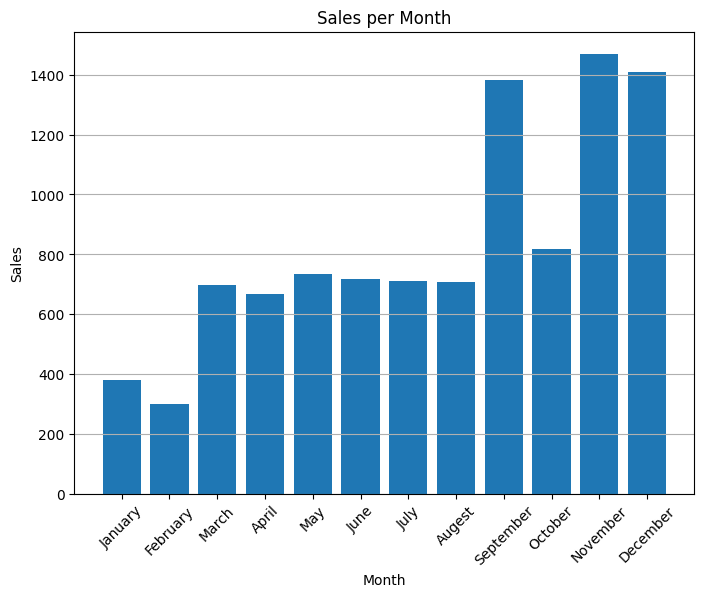

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [24]:
#bar graph of sales on each month
plt.figure(figsize=(8,6))
plt.bar(month_sales_df["Order_Month"].apply(lambda x:Month_dict[x]), month_sales_df["Sales"])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales per Month")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.show()
plt.close

#### The graph above shows that september, november and december far outclass other months in sales. Now we will delve deeper into what is sold more in each month.

In [25]:
#making a df for the sales of each category in a given month
month_category_sales_df = pd.DataFrame(df.groupby(["Order_Month","Category"])["Sales"].count())
month_category_sales_df.reset_index(inplace=True)

In [26]:
#renaming the month col from integers to month names
month_category_sales_df["Order_Month"] = month_category_sales_df["Order_Month"].apply(lambda x:Month_dict[x])
month_category_sales_df.set_index(["Order_Month","Category"], inplace=True)

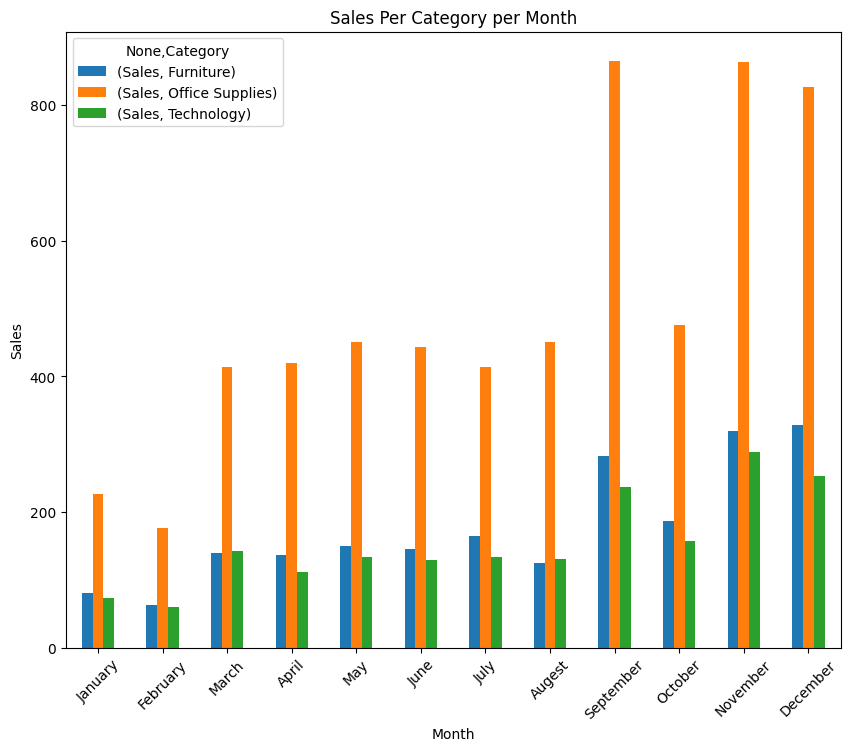

In [27]:
#plotting the sales per category per month
month_category_sales_df.unstack(sort=False).plot(kind="bar", figsize=(10,8), title="Sales Per Category per Month",
                                                legend=True, xlabel="Month", ylabel="Sales")
plt.xticks(rotation=45)
plt.show()
plt.close()

#### The graph above can be used to expect how much each category of goods will be sold in each month and to prepare stock for the demand.

####     


#### *Exploratory Data Analysis can be used to answer a great number of questions and gain a deep insight into the buisiness.*

## Dealing with categorical values in preparation for costumer segmentation ML models

In [28]:
# ordinal encoding ship mode
ordinal_dict = {"Standard Class":1, "Second Class":2, "First Class":3, "Same Day":4}
df["Ship_Mode_Encoded"] = df["Ship_Mode"].apply(lambda x:ordinal_dict[x])

In [29]:
# onehotencoding segment
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
oh_encoded = oh_encoder.fit_transform(df[["Segment"]])
oh_df = pd.DataFrame(oh_encoded, columns=oh_encoder.get_feature_names_out())
df = df.join(oh_df)    #join the encoded cols to original df
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Sales,Quantity,Discount,Profit,Order_Weekday,Order_Month,Ship_Mode_Encoded,Segment_Consumer,Segment_Corporate,Segment_Home Office
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,261.9600,2,0.00,41.9136,1,11,2,1.0,0.0,0.0
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,731.9400,3,0.00,219.5820,1,11,2,0.0,1.0,0.0
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,14.6200,2,0.00,6.8714,6,6,2,1.0,0.0,0.0
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,957.5775,5,0.45,-383.0310,6,10,1,1.0,0.0,0.0
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,22.3680,2,0.20,2.5164,6,10,1,1.0,0.0,0.0


In [30]:
# onehotencoding Category
oh_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
oh_encoded = oh_encoder.fit_transform(df[["Category"]])
oh_df = pd.DataFrame(oh_encoded, columns=oh_encoder.get_feature_names_out())
df = df.join(oh_df)
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Profit,Order_Weekday,Order_Month,Ship_Mode_Encoded,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,41.9136,1,11,2,1.0,0.0,0.0,1.0,0.0,0.0
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,219.5820,1,11,2,0.0,1.0,0.0,0.0,1.0,0.0
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,6.8714,6,6,2,1.0,0.0,0.0,1.0,0.0,0.0
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,-383.0310,6,10,1,1.0,0.0,0.0,0.0,1.0,0.0
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,2.5164,6,10,1,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
# see if any col has null values
df.isnull().sum()

Order_ID                    0
Order_Date                  0
Ship_Date                   0
Ship_Mode                   0
Customer_ID                 0
Customer_Name               0
Segment                     0
Country                     0
City                        0
State                       0
Postal_Code                 0
Region                      0
Product_ID                  0
Category                    0
Sub_Category                0
Product_Name                0
Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Order_Weekday               0
Order_Month                 0
Ship_Mode_Encoded           0
Segment_Consumer            2
Segment_Corporate           2
Segment_Home Office         2
Category_Furniture          2
Category_Office Supplies    2
Category_Technology         2
dtype: int64

In [32]:
#drop any null rows
df.dropna(inplace=True)
#issue fixed
df.isnull().sum()

Order_ID                    0
Order_Date                  0
Ship_Date                   0
Ship_Mode                   0
Customer_ID                 0
Customer_Name               0
Segment                     0
Country                     0
City                        0
State                       0
Postal_Code                 0
Region                      0
Product_ID                  0
Category                    0
Sub_Category                0
Product_Name                0
Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Order_Weekday               0
Order_Month                 0
Ship_Mode_Encoded           0
Segment_Consumer            0
Segment_Corporate           0
Segment_Home Office         0
Category_Furniture          0
Category_Office Supplies    0
Category_Technology         0
dtype: int64

## Clustering

In [33]:
#use standardsclaer to enhance the performance of kmeans clustering model.
from sklearn.preprocessing import StandardScaler

#features to be used in clustering
customer_data = df.groupby('Customer_ID').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit': 'sum',
    'Ship_Mode_Encoded':  lambda x: x.mode().iloc[0],
    'Segment_Consumer': 'sum',
    'Segment_Corporate': 'sum',
    'Segment_Home Office': 'sum',
    'Category_Furniture': 'sum',
    'Category_Office Supplies': 'sum',
    'Category_Technology': 'sum',
}).reset_index()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop('Customer_ID', axis=1))

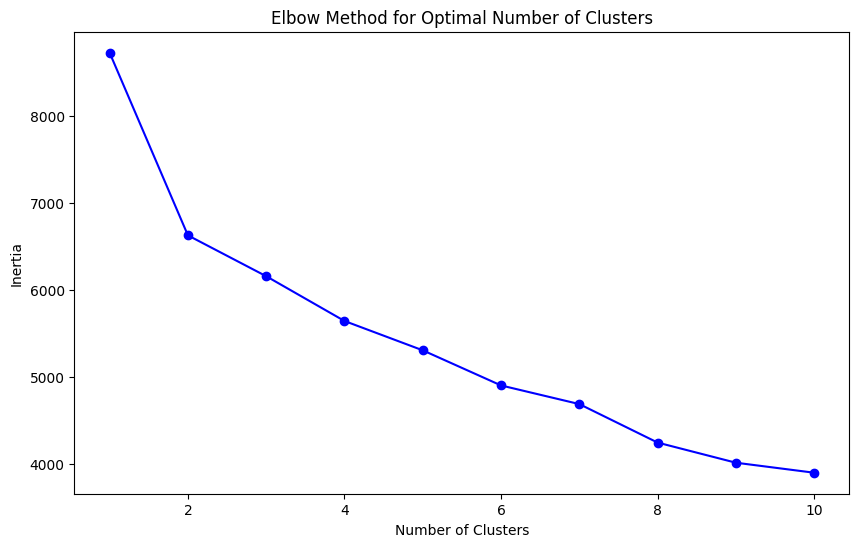

In [34]:
#finding optimal number of clusters for kmeans
from sklearn.cluster import KMeans

#evaluating the performance of model by inertia
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()
plt.close()

#### We see that inertia is too high so we have overfitted and must decrease num of features for clustering

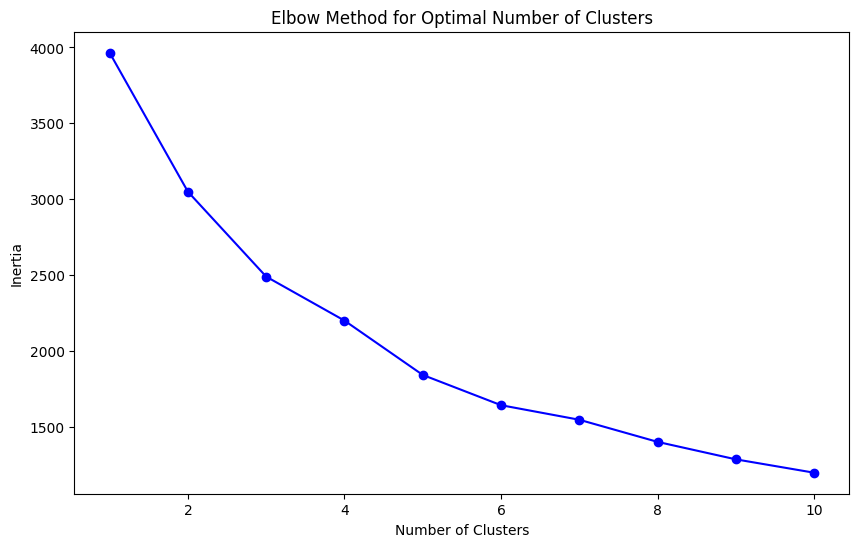

In [35]:
#features to be used in clustering
customer_data = df.groupby('Customer_ID').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit': 'sum',
    'Ship_Mode_Encoded':  lambda x: x.mode().iloc[0]
}).reset_index()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop('Customer_ID', axis=1))
#finding optimal number of clusters for kmeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()
plt.close()

#### As we see the optimal num of clusters is 3

In [36]:
#clustering the costumers

kmeans = KMeans(n_clusters=3, random_state=41)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=41)

In [37]:
#adding the cluster label to costumer's data
customer_data["Cluster"] = kmeans.labels_
customer_data

,Customer_ID,Sales,Quantity,Discount,Profit,Ship_Mode_Encoded,Cluster
0,AA-10315,5563.560,30,0.090909,-362.8825,1,0
1,AA-10375,1056.390,41,0.080000,277.3824,1,0
2,AA-10480,1790.512,36,0.016667,435.8274,1,0
3,AA-10645,5086.935,64,0.063889,857.8033,1,1
4,AB-10015,886.156,13,0.066667,129.3465,3,2
...,...,...,...,...,...,...,...
788,XP-21865,2374.658,100,0.046429,621.2300,1,1
789,YC-21895,5454.350,31,0.075000,1305.6290,1,1
790,YS-21880,6720.444,58,0.050000,1778.2923,1,1
791,ZC-21910,8025.707,105,0.254839,-1032.1490,1,1


In [38]:
#Adding customer;s cluster to the original df
df = pd.merge(df, customer_data[["Customer_ID","Cluster"]], on="Customer_ID", how="left")

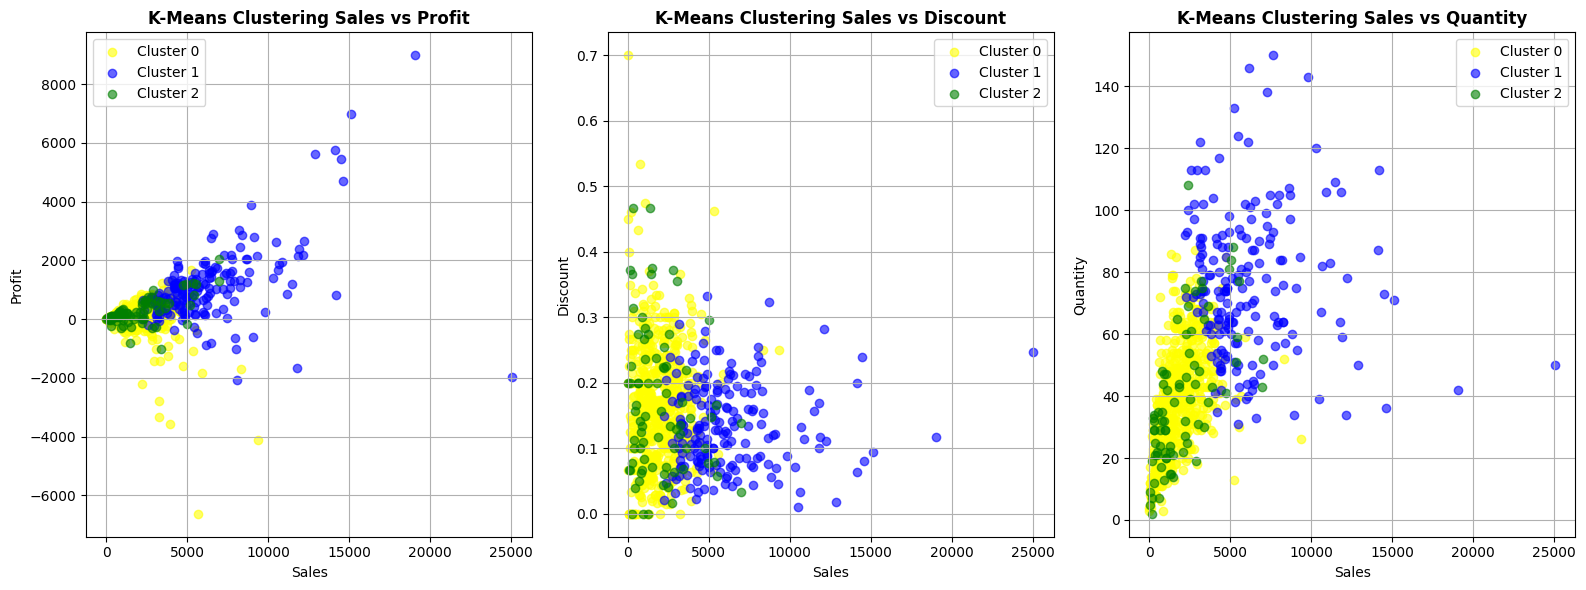

In [39]:
#plotting sales,proft,discount, and quantity percostumer cluster
colors = ["yellow", "blue", "green"]
plt.figure(figsize=(16,6))

#plotting sales vs proft per cluster
plt.subplot(1,3,1)
for cluster in range(customer_data["Cluster"].nunique()):
    cluster_data = customer_data[customer_data["Cluster"] == cluster]
    plt.scatter(cluster_data["Sales"], cluster_data["Profit"], label=f"Cluster {cluster}", color = colors[cluster], alpha=0.6)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("K-Means Clustering Sales vs Profit", fontweight="bold")
plt.legend()
plt.grid(True)

#plotting sales vs discount per cluster
plt.subplot(1,3,2)
for cluster in range(customer_data["Cluster"].nunique()):
    cluster_data = customer_data[customer_data["Cluster"] == cluster]
    plt.scatter(cluster_data["Sales"], cluster_data["Discount"], label=f"Cluster {cluster}", color = colors[cluster], alpha=0.6)
plt.xlabel("Sales")
plt.ylabel("Discount")
plt.title("K-Means Clustering Sales vs Discount", fontweight="bold")
plt.legend()
plt.grid(True)

#plotting sales vs quantity
plt.subplot(1,3,3)
for cluster in range(customer_data["Cluster"].nunique()):
    cluster_data = customer_data[customer_data["Cluster"] == cluster]
    plt.scatter(cluster_data["Sales"], cluster_data["Quantity"], label=f"Cluster {cluster}", color = colors[cluster], alpha=0.6)
plt.xlabel("Sales")
plt.ylabel("Quantity")
plt.title("K-Means Clustering Sales vs Quantity", fontweight="bold")
plt.legend()
plt.grid(True)

#avoid overlap while plotting
plt.tight_layout()
plt.show()
plt.close()

#### From plot#1 we see that cluster#1 is most profitable per sale.
#### From plot#2 we see that cluster#1 has more sales per less discount and cluster#0 has more sale per more discount.
#### From plot#3 we see that cluster#1 has most Quantity per Sale and cluster#2 has least Quantity per sale.

#### Cluster#0 shops a high quantity of goods on discount and has zero to negative profit; This should be addressed

### Now lets see the preffered ship mode, segment, and category of each cluster; and also their region

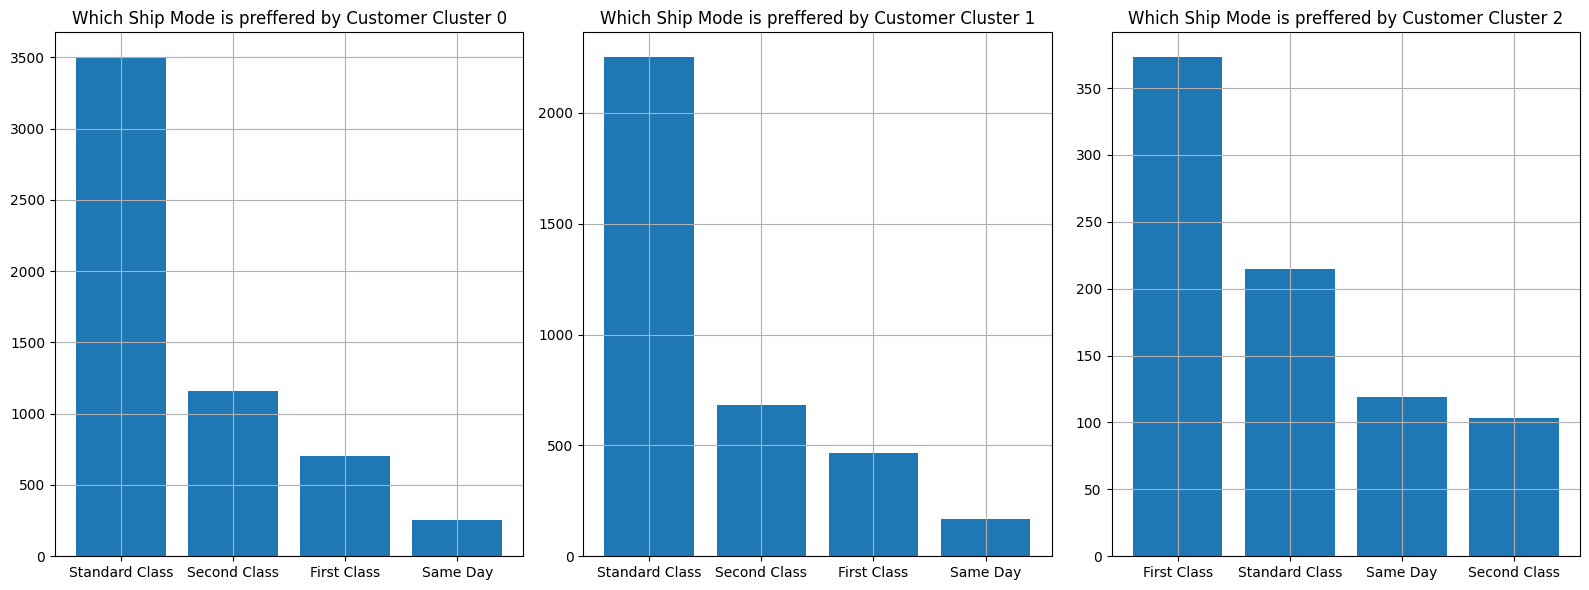

In [40]:
#plotting ship mode per cluster

plt.figure(figsize=(16,6))

for cluster in range(df["Cluster"].nunique()):
    plt.subplot(1,3,cluster+1)
    cluster_data = df[df["Cluster"] == cluster]
    counts = cluster_data["Ship_Mode"].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title(f"Which Ship Mode is preffered by Customer Cluster {cluster}")
    plt.grid(True)


#avoid overlap while plotting
plt.tight_layout()
plt.show()
plt.close()

#### We see that in clusters #0 and #1 distribution is similar with Standard Class ship mode far outclassing the rest.
#### Cluster#2 is completely different from the others and in it First Class shipment is the most popular although there is less of a difference between it and the second most popular mode of shipment(Standard Class)

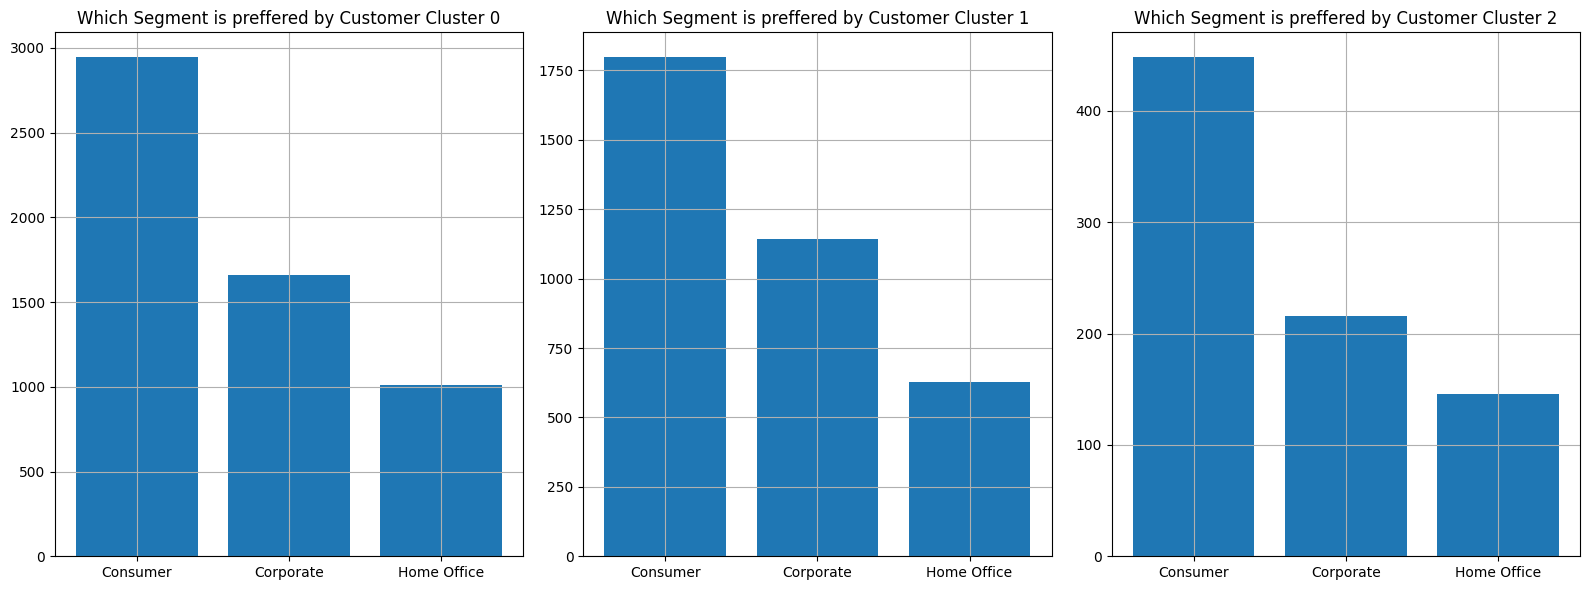

In [41]:
#plotting segment per cluster

plt.figure(figsize=(16,6))

for cluster in range(df["Cluster"].nunique()):
    plt.subplot(1,3,cluster+1)
    cluster_data = df[df["Cluster"] == cluster]
    counts = cluster_data["Segment"].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title(f"Which Segment is preffered by Customer Cluster {cluster}")
    plt.grid(True)


#avoid overlap while plotting
plt.tight_layout()
plt.show()
plt.close()

#### We see that segment distribution is the same across all clusters with Consumer being the most and Home Office being the least repeated segments.

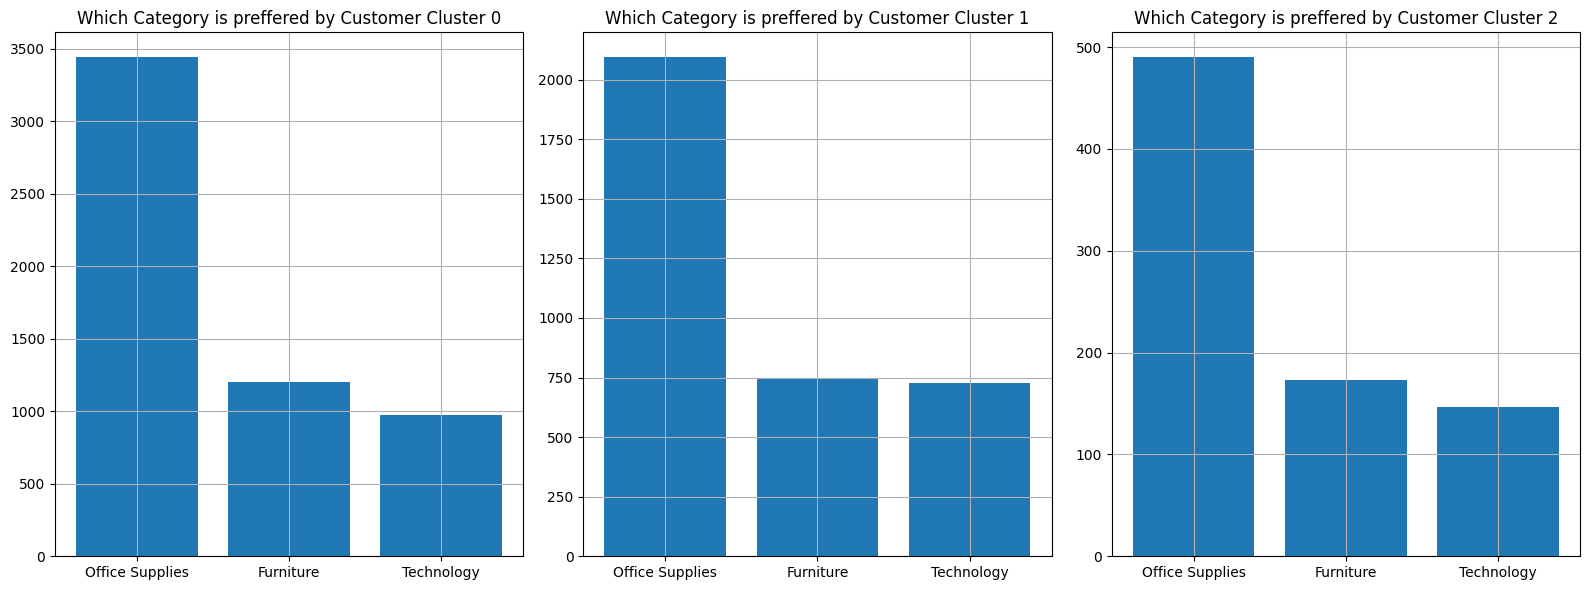

In [42]:
#plotting category per cluster

plt.figure(figsize=(16,6))

for cluster in range(df["Cluster"].nunique()):
    plt.subplot(1,3,cluster+1)
    cluster_data = df[df["Cluster"] == cluster]
    counts = cluster_data["Category"].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title(f"Which Category is preffered by Customer Cluster {cluster}")
    plt.grid(True)


#avoid overlap while plotting
plt.tight_layout()
plt.show()
plt.close()

#### Again we see that the distribution is about the same with Office Supplies far outweighing the other two which are about the same.

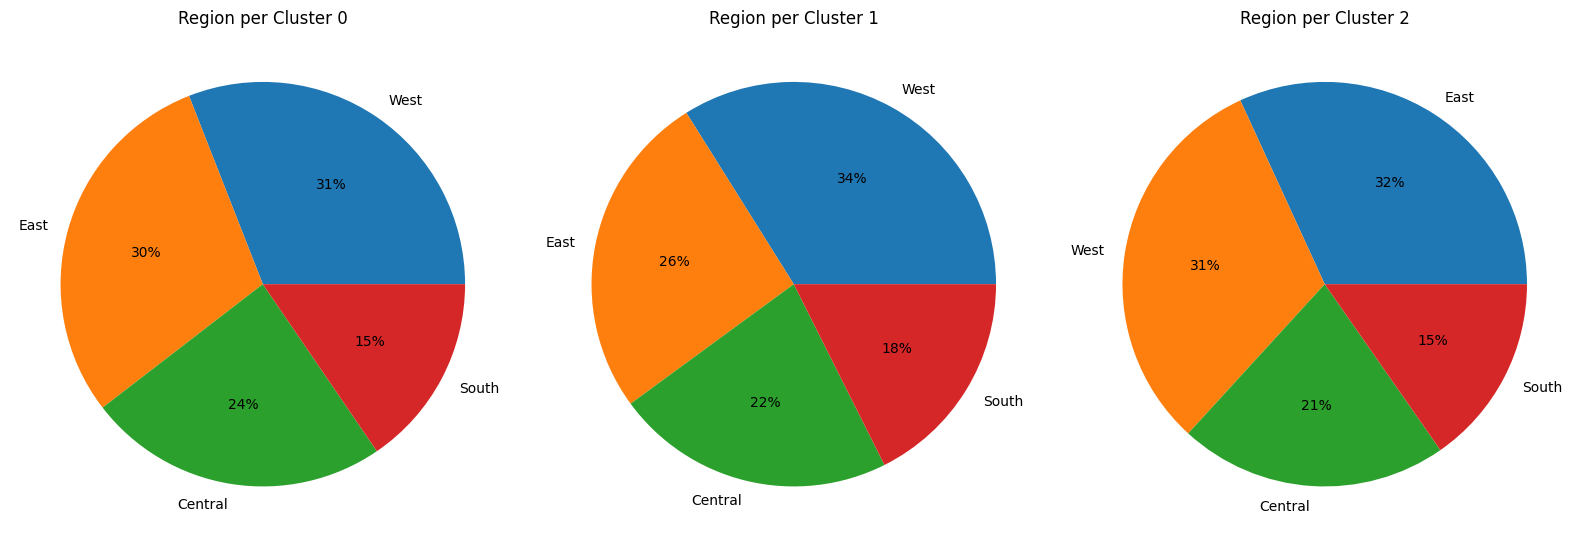

In [43]:
#plotting region per cluster

plt.figure(figsize=(16,6))

for cluster in range(df["Cluster"].nunique()):
    plt.subplot(1,3,cluster+1)
    cluster_data = df[df["Cluster"] == cluster]
    plt.pie(cluster_data["Region"].value_counts(), labels = cluster_data["Region"].value_counts().index, autopct='%1.0f%%')
    plt.title(f"Region per Cluster {cluster}")


#avoid overlap while plotting
plt.tight_layout()
plt.show()
plt.close()

#### And again we see that region distribution is about the same throughout all clusters with East and West being the most prominant

## Conclusion
#### As we saw there is a lot of insight that can be extracted from data and this is just a small portion of what is possible; In essense data is to be used for answering business questions and given the right question more insight can be gained from raw data.